In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load Dataset

In [15]:
file_path = "../data/clean/2024-11-27_00-47-15.csv"
df = pd.read_csv(file_path)

print("Data Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Task      1399 non-null   object
 1   Category  1399 non-null   object
dtypes: object(2)
memory usage: 22.0+ KB
None

First 5 Rows:
                             Task                  Category
0         finish quarterly report          urgent important
1  schedule meeting with client x          urgent important
2         respond to urgent email      urgent not-important
3                      clean desk  not-urgent not-important
4  learn new programming language      not-urgent important


# Duplicate Check

In [16]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 24


#### Delete duplicates

In [17]:
df = df.drop_duplicates()

# Plot a graph of label distribution


Label Distribution:
 Category
not-urgent important        523
not-urgent not-important    414
urgent important            283
urgent not-important        155
Name: count, dtype: int64


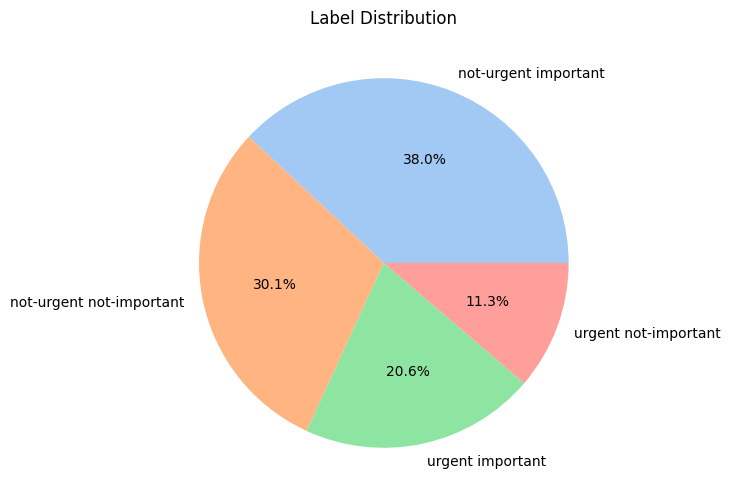

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_45656\3160590295.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


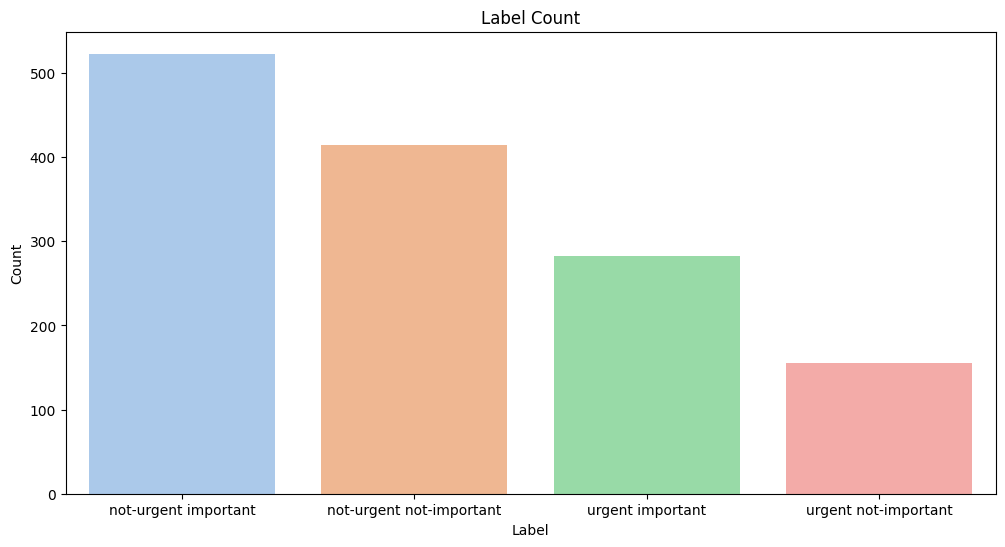

In [ ]:
if 'Category' in df.columns:
    label_counts = df['Category'].value_counts()
    print("\nLabel Distribution:\n", label_counts)

    # Pie Chart Label Distribution
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title("Label Distribution")
    plt.ylabel('')
    plt.show()

    # Bar Chart Label Count
    plt.figure(figsize=(12, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")
    plt.title("Label Count")
    plt.ylabel("Count")
    plt.xlabel("Label")
    plt.show()

# Text Preprocessing Analysis


Text Length Summary:
count    1375.000000
mean       26.663273
std         8.029834
min         6.000000
25%        21.000000
50%        25.000000
75%        31.000000
max        74.000000
Name: text_length, dtype: float64


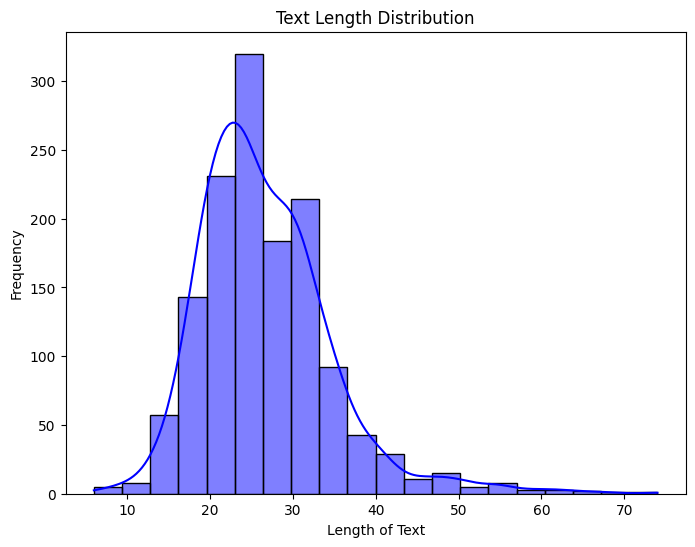

In [19]:
if 'Task' in df.columns:
    
    # Text Length Analysis
    df['text_length'] = df['Task'].apply(lambda x: len(str(x)))
    print("\nText Length Summary:")
    print(df['text_length'].describe())

    # Visualize Text Length Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['text_length'], bins=20, kde=True, color='blue')
    plt.title("Text Length Distribution")
    plt.xlabel("Length of Text")
    plt.ylabel("Frequency")
    plt.show()


# Save Dataset

In [20]:
now = datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
df.to_csv(f"../data/clean/{now}.csv", index=False)